In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
filename = 'auto-mpg.csv'

In [219]:
df = pd.read_csv(filename)
df

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [188]:
type(df)

pandas.core.frame.DataFrame

## EDA - Exploratory Data Analysis

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   %mpg          398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [225]:
df['origin'] = df['origin'].map({1:'USA', 2:'EUROPE', 3:'ASIA'})

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

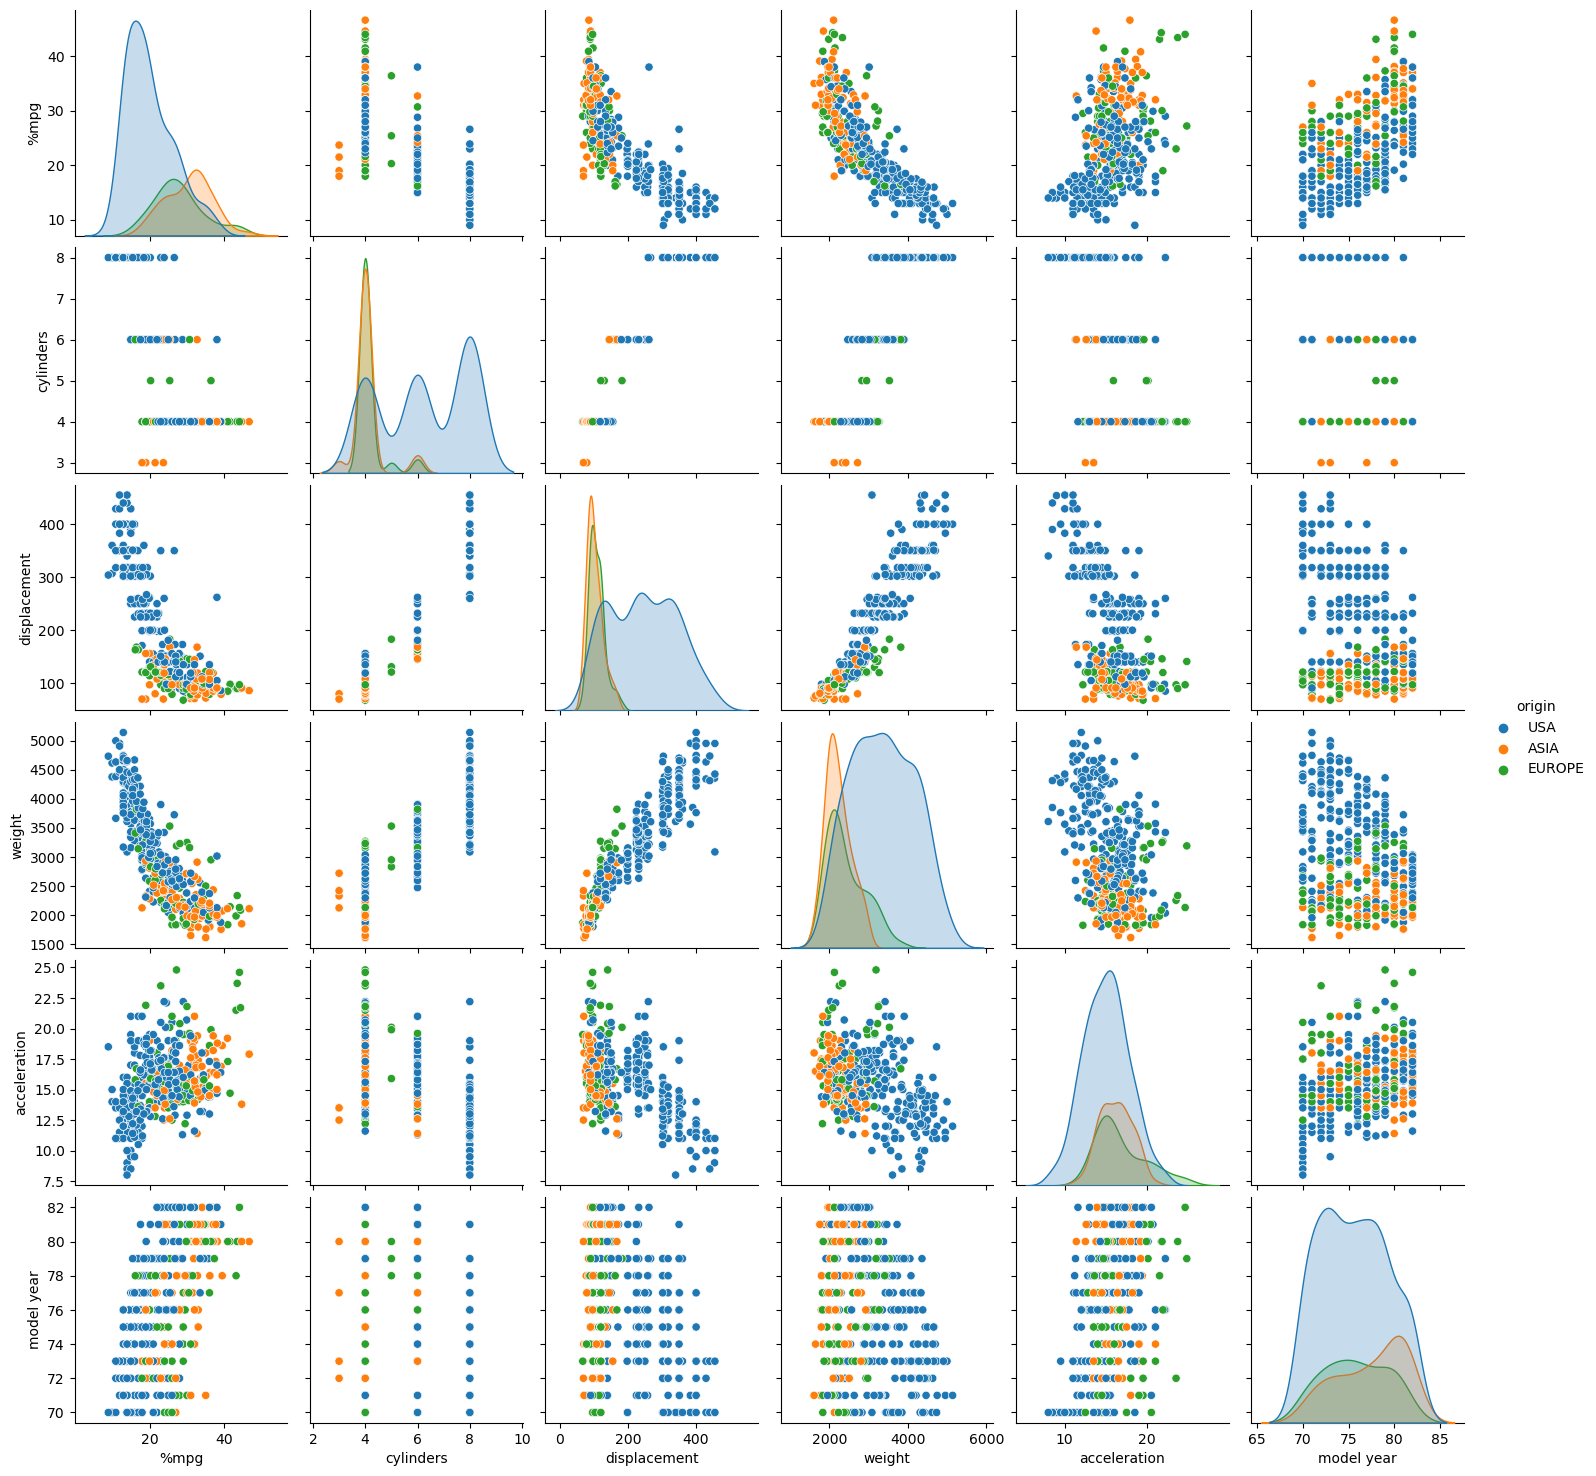

In [226]:
sns.pairplot(df, hue = 'origin')

## Data Wrangling

In [208]:
df['horsepower'].astype('float')

ValueError: could not convert string to float: '?   '

In [209]:
df.loc[df['horsepower'].str.strip() == '?', 'horsepower'] = np.NaN

In [210]:
df[df['horsepower'].isna()]

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [211]:
df['horsepower'] = df['horsepower'].astype('float')

In [212]:
df['horsepower'].dtype

dtype('float64')

In [74]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [77]:
df[df.index==32]

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto


In [86]:
df.loc[df['model year']==71, ['horsepower', 'weight', 'car name', 'model year']]

,horsepower,weight,car name,model year
29,88.0,2130.0,datsun pl510,71
30,90.0,2264.0,chevrolet vega 2300,71
31,95.0,2228.0,toyota corona,71
32,NaN,2046.0,ford pinto,71
33,100.0,2634.0,amc gremlin,71
34,105.0,3439.0,plymouth satellite custom,71
35,100.0,3329.0,chevrolet chevelle malibu,71
36,88.0,3302.0,ford torino 500,71
37,100.0,3288.0,amc matador,71
38,165.0,4209.0,chevrolet impala,71


In [100]:
df

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [117]:
df.loc[df['horsepower']==0, ['horsepower']]

,horsepower
126,0.0
330,0.0
336,0.0
354,0.0
374,0.0


In [126]:
df_usa = df[df['origin'] == 1].copy()

In [127]:
df_usa

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [130]:
df['kpl'] = df['%mpg'] * 0.42514371

In [136]:
df.drop('verbruik', axis = 1, inplace = True)

In [137]:
df

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652587
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377156
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652587
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.802299
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,11.478880
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,18.706323
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,13.604599
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,11.904024


In [138]:
df.isna()

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False


In [155]:
df.loc[df['horsepower']==-1, 'horsepower'] = np.nan

In [156]:
df[df['horsepower'].isna()]

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick,8.928018
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe,17.388378
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra,10.033392
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i,14.667458
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl,9.778305


In [205]:
df = df.dropna()

In [151]:
df['horsepower'] = df['horsepower'].fillna(-1)

In [159]:
df['car name'].str.contains('?', regex = False)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: car name, Length: 397, dtype: bool

In [160]:
df

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652587
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377156
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652587
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.802299
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,11.478880
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,18.706323
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,13.604599
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,11.904024


In [161]:
df['origin'].unique()

array([1, 3, 2])

In [163]:
df['cylinders'].value_counts()

cylinders
4    203
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [191]:
df[~(df['horsepower'].astype('str').str.match('^\d*\.?\d*$'))]

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [199]:
series = pd.Series(['1','2','0','.5','5.'])
series.astype('float')

0    1.0
1    2.0
2    0.0
3    0.5
4    5.0
dtype: float64

In [216]:
df[['cylinders','horsepower','acceleration']].groupby('cylinders').agg(['max','mean','min','size'])

horsepower                        acceleration                      
                 max        mean   min size          max       mean   min size
cylinders                                                                     
3              110.0   99.250000  90.0    4         13.5  13.250000  12.5    4
4              115.0   78.281407  46.0  204         24.8  16.601471  11.6  204
5              103.0   82.333333  67.0    3         20.1  18.633333  15.9    3
6              165.0  101.506024  72.0   84         21.0  16.263095  11.3   84
8              230.0  158.300971  90.0  103         22.2  12.955340   8.0  103